# Predict Future Sales
Davey Anguiano <br>
CS 477<br>
Spring 2021<br>
<br>
Using Recurrent Neural Networks and Long Short-Term Memory produces a Root Mean Square Error as a prediction.
Allowing to interpret the findings and repesent them into a line graph.
This takes method takes all the data from the dataset file and converts the number of items sold per day, into the number of items sold per month.
Once, the matrix is transformed, the creation of a Sequential model to train and test with is started.<br>
<br>
References:  Min Xian for LSTM template and Carmen J Su (Keggle Forums) for data manipulation
##### Note: There is a warning from TensorFlow reporting "<i>called on an input with incompatible shape<i>"


In [1]:
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 4.0)

# 1. Load data

In [19]:
data = pd.read_csv('../finalProjectFiles/input/sales_train.csv')
print ('total_shops: ', data['shop_id'].max())
print ('total_items: ', data['item_id'].max())
num_month = data['date_block_num'].max()
print ('number of month: ', num_month)
print ('size of train: ', data.shape)

total_shops:  59
total_items:  22169
number of month:  33
size of train:  (2935849, 6)


In [20]:
data = data.groupby(["item_id","shop_id","date_block_num"]).sum().reset_index()
data = data.rename(index=str, columns = {"item_cnt_day":"item_cnt_month"})
data = data[["item_id","shop_id","date_block_num","item_cnt_month"]]
data.head()

,item_id,shop_id,date_block_num,item_cnt_month
0,0,54,20,1.0
1,1,55,15,2.0
2,1,55,18,1.0
3,1,55,19,1.0
4,1,55,20,1.0


In [4]:
check_info_valid = data[["shop_id","item_id","date_block_num","item_cnt_month"]]
check_info_valid = check_info_valid.loc[check_info_valid['shop_id'] == 5]
check_info_valid = check_info_valid.loc[check_info_valid['item_id'] == 4244]
check_info_valid

,shop_id,item_id,date_block_num,item_cnt_month
321255,5,4244,4,3.0
321256,5,4244,5,1.0
321257,5,4244,6,2.0
321258,5,4244,7,1.0
321259,5,4244,8,3.0
321260,5,4244,9,2.0
321261,5,4244,10,1.0
321262,5,4244,11,2.0
321263,5,4244,12,3.0
321264,5,4244,13,2.0


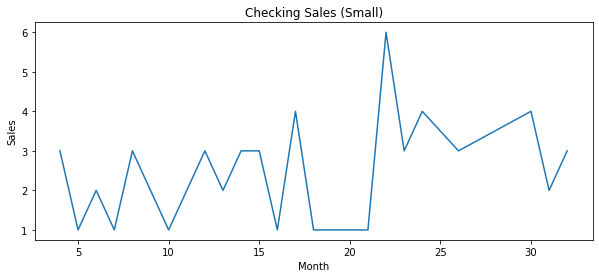

In [5]:
plt.figure(figsize=(10,4))
plt.title('Checking Sales (Small)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(check_info_valid["date_block_num"],check_info_valid["item_cnt_month"]);

In [6]:
month_list=[i for i in range(num_month+1)]
shop = []
for i in range(num_month+1):
    shop.append(5)
item = []
for i in range(num_month+1):
    item.append(4244)
months = pd.DataFrame({'shop_id':shop, 'item_id':item,'date_block_num':month_list})
months

,shop_id,item_id,date_block_num
0,5,4244,0
1,5,4244,1
2,5,4244,2
3,5,4244,3
4,5,4244,4
5,5,4244,5
6,5,4244,6
7,5,4244,7
8,5,4244,8
9,5,4244,9


In [7]:
sales = pd.merge(check_info_valid, months, how='right', on=['shop_id','item_id','date_block_num'])
sales = sales.sort_values(by=['date_block_num'])
sales.fillna(0.00,inplace=True)
sales

,shop_id,item_id,date_block_num,item_cnt_month
0,5,4244,0,0.0
1,5,4244,1,0.0
2,5,4244,2,0.0
3,5,4244,3,0.0
4,5,4244,4,3.0
5,5,4244,5,1.0
6,5,4244,6,2.0
7,5,4244,7,1.0
8,5,4244,8,3.0
9,5,4244,9,2.0


,shop_id,item_id,date_block_num,item_cnt_month
0,5,4244,0,0.0
1,5,4244,1,0.0
2,5,4244,2,0.0
3,5,4244,3,0.0
4,5,4244,4,3.0
5,5,4244,5,1.0
6,5,4244,6,2.0
7,5,4244,7,1.0
8,5,4244,8,3.0
9,5,4244,9,2.0


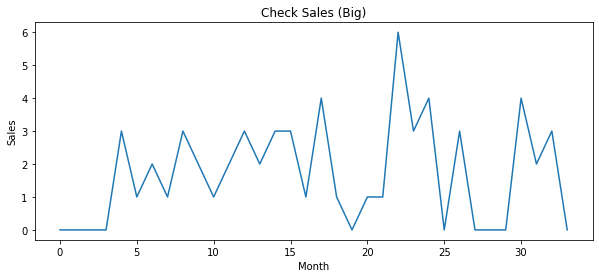

In [8]:
plt.figure(figsize=(10,4))
plt.title('Check Sales (Big)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(sales["date_block_num"],sales["item_cnt_month"]);
sales.fillna(0.0, inplace=True)
sales

In [9]:
df = sales[['shop_id','item_id','date_block_num', 'item_cnt_month']].reset_index()
df = df.drop(labels = ['index', 'item_id', 'shop_id', 'date_block_num'], axis = 1)
df

,item_cnt_month
0,0.0
1,0.0
2,0.0
3,0.0
4,3.0
5,1.0
6,2.0
7,1.0
8,3.0
9,2.0


# 2. Data preprocessing 

In [10]:
data = df.values
data = data.astype('float32')
data.shape

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
print('First 10 data after scaling:\r\n', data[0:10])

First 10 data after scaling:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.5       ]
 [0.16666667]
 [0.33333334]
 [0.16666667]
 [0.5       ]
 [0.33333334]]


# 3. Split into train and test sets

In [11]:
train_size = int(len(data) * 0.65)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

22 12


# 4. Prepare the training set and test set

In [12]:
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    m = len(Y)
    return np.array(X), np.array(Y).reshape(m, 1)

print('Shapes:')

# Reshape
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print('training set:', trainX.shape, trainY.shape, 'test set:', testX.shape, testY.shape)

# Reshape input
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print('training set:', trainX.shape, 'test set:', testX.shape)

training set shape: (19, 2) (19, 1) test set shape: (9, 2) (9, 1)
training set shape: (19, 1, 2) test set shape: (9, 1, 2)


# 5. Create and train the LSTM network

In [13]:
model = Sequential()
model.add(LSTM(1, input_shape=(9,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 16        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
19/19 - 0s - loss: 0.1171 - accuracy: 0.1579
Epoch 2/50
19/19 - 0s - loss: 0.1077 - accuracy: 0.1579
Epoch 3/50
19/19 - 0s - loss: 0.0999 - accuracy: 0.1579
Epoch 4/50
19/19 - 0s - loss: 0.0921 - accuracy: 0.1579
Epoch 5/50
19/19 - 0s - loss: 0.0852 - accuracy: 0.1579
Epoch 6/50
19/19 - 0s - loss: 0.0790 - accuracy: 0.1579
Epoch 7/50
19/19 - 0s - loss: 0.0736 - accuracy: 0.1579
Epoch 8/50
19/19 - 0s - loss: 0.0692 - accuracy: 0.1579
Epoch 9/50
19/19 - 0s - loss: 0.0637 - accuracy: 0.1579
Epoch 10/50
19/19 - 0s - loss: 0.0601 - accuracy: 0.1579
Epoch 11/50
19/19 - 0s - loss: 0.0565 - accuracy: 0.1579
Epoch 12/50
19/19 - 0s - loss: 0.0532 - accuracy: 0.1579
Epoch 13/50
19/19 - 0s - loss: 0.0504 - accuracy: 0.1579
Epoch 14/50
19/19 - 0s - loss: 0.0485 - accuracy: 0.1579
Epoch 15/50
19/19 - 0s - loss: 0.0460 - accuracy: 0.1579
Epoch 16/50
19/19 - 0s - loss: 0.0445 - accuracy: 0.1579
Epoch 17/50
19/19 - 0s - loss: 0.0430 - accuracy: 0.1579
Epoch 18/50
19/19 - 0s - loss: 0.0417 - 

# 6. Evaluation

In [15]:
# Make predictions
train_pred = model.predict(trainX)
test_pred = model.predict(testX)

# Invert predictions
train_pred = scaler.inverse_transform(train_pred)
trainY1 = scaler.inverse_transform(trainY)

test_pred = scaler.inverse_transform(test_pred)
testY1 = scaler.inverse_transform(testY)

# Calculate root mean squared error
trainRMSE = np.sqrt(mean_squared_error(trainY1, train_pred))
print('Train RMSE: %.2f ' % (trainRMSE))
testRMSE = np.sqrt(mean_squared_error(testY1, test_pred))
print('Test RMSE: %.2f' % (testRMSE))

Train RMSE: 1.14 
Test RMSE: 1.65


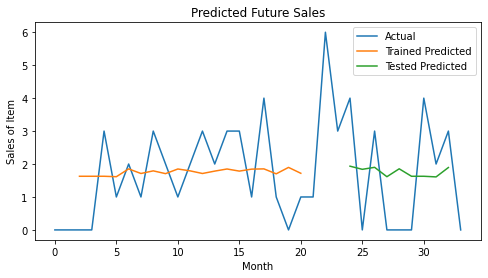

In [16]:
# Shift train predictions for plotting
train_pred_plot = np.empty_like(data)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_pred)+look_back, :] = train_pred

# Shift test predictions for plotting
test_pred_plot = np.empty_like(data)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred)+(look_back*2)+1:len(data)-1, :] = test_pred

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(data), label='Actual')
plt.plot(train_pred_plot, label='Trained Predicted')
plt.plot(test_pred_plot, label='Tested Predicted')
plt.title('Predicted Future Sales')
plt.xlabel('Month')
plt.ylabel('Sales of Item')
plt.legend()
plt.show()